# Loading and preparing data

In [1]:
## Run this only one time!

#---------------------------------#
# Clear workspace
#---------------------------------#

rm(list = ls())

#---------------------------------#
# Load libraries
#---------------------------------#

#library(repr)
library(ggplot2)
library(plm)
library(plyr)
library(dplyr)
library(tidyr)
library(data.table)
#library(clubSandwich) #for clustered standard errors
#library(lmtest)
#library(Hmisc) #for constructing latex tables
#library(stargazer) # ibid

#---------------------------------#
# Load main data
#---------------------------------#

data <- fread("../Data/yearStateXrd-RDUserCost-GDP-firmEntryMeasures_stateLevel_compustatAggregation.csv")

data <- data %>% rename(normalizationType = IndustryId)

data <- data[normalizationType == 1]

data <- data %>% select(state,year,Firms,firmsTotal,
                    Estabs,estabsTotal,Emp,
                    empTotal,xrd,xrdRaw,GDP,rho_high) 

data <- copy(data)

#---------------------------------#
# Load NSF IRIS data
#---------------------------------#

temp <- fread("../Data/yearStateXRD_NSFaggregate.csv")

setkey(temp,state,year)
setkey(data,state,year)

#---------------------------------#
# Merge
#---------------------------------#

data <- merge(data,temp)

#---------------------------------#
# Construct normalized variables
#---------------------------------#

data[,firmsNorm := Firms / firmsTotal]
data[,estabsNorm := Estabs / estabsTotal]
data[,empNorm := Emp / empTotal]

data[,firmsGDP := Firms / gdpBusinessNSF]
data[,estabsGDP := Estabs / gdpBusinessNSF]
data[,empGDP := Emp / gdpBusinessNSF]

data[,xrdGDP := xrd / gdpBusinessNSF]
data[,xrdRawGDP := xrdRaw / gdpBusinessNSF]

data[,xrdBusinessNSF_gdpBusinessNSF := xrdBusinessNSF / gdpBusinessNSF]
data[,xrdBusinessNSF_gdpTotalNSF := xrdBusinessNSF / gdpTotalNSF]
data[,xrdTotalNSF_gdpTotalNSF := xrdTotalNSF / gdpTotalNSF]

#---------------------------------#
# Display names 
#---------------------------------#

names(data)

Loading required package: Formula

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:plm’:

    between, lag, lead

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:plm’:

    between



[1] "state"                         "year"                         
 [3] "Firms"                         "firmsTotal"                   
 [5] "Estabs"                        "estabsTotal"                  
 [7] "Emp"                           "empTotal"                     
 [9] "xrd"                           "xrdRaw"                       
[11] "GDP"                           "rho_high"                     
[13] "xrdBusinessNSF"                "gdpBusinessNSF"               
[15] "xrdTotalNSF"                   "gdpTotalNSF"                  
[17] "firmsNorm"                     "estabsNorm"                   
[19] "empNorm"                       "firmsGDP"                     
[21] "estabsGDP"                     "empGDP"                       
[23] "xrdGDP"                        "xrdRawGDP"                    
[25] "xrdBusinessNSF_gdpBusinessNSF" "xrdBusinessNSF_gdpTotalNSF"   
[27] "xrdTotalNSF_gdpTotalNSF"

# Visualization

## Different measures of R&D

Warning message:
“Removed 211 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 211 rows containing missing values (geom_point).”

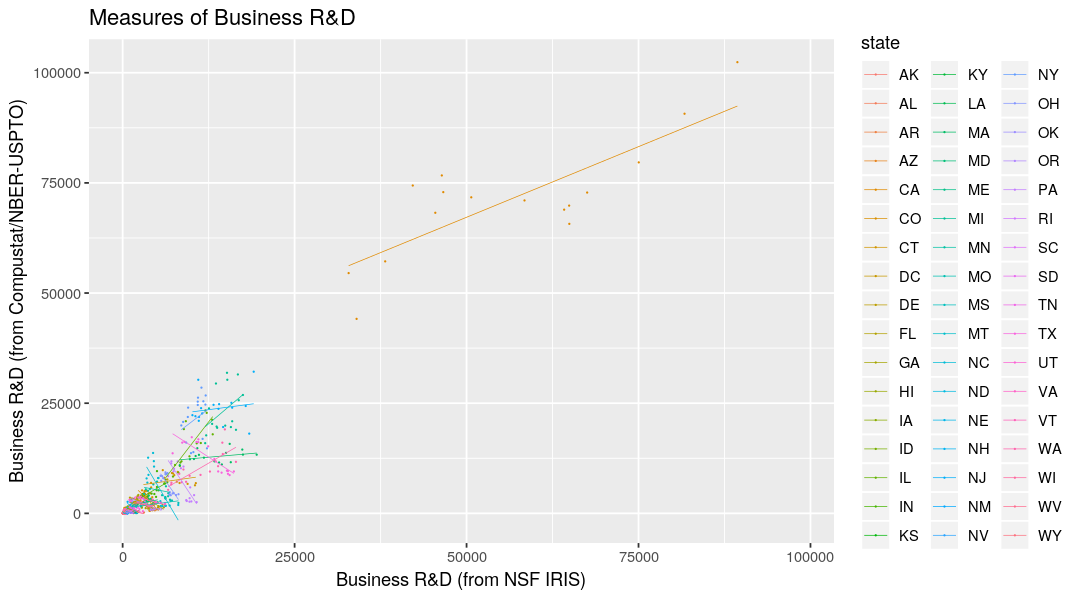

In [3]:
options(repr.plot.width = 9, repr.plot.height = 5)

ggplot(data,aes(x = xrdBusinessNSF, y = xrd, color = state)) + 
    geom_point(size = 0) + 
    geom_smooth(method = lm,size = 0.2, se = FALSE) + 
    labs(x = "Business R&D (from NSF IRIS)", y = "Business R&D (from Compustat/NBER-USPTO)") + 
    ggtitle("Measures of Business R&D")

## Entry measures vs R&D

Warning message:
“Removed 51 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 51 rows containing missing values (geom_point).”

Warning message:
“Removed 160 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 160 rows containing missing values (geom_point).”

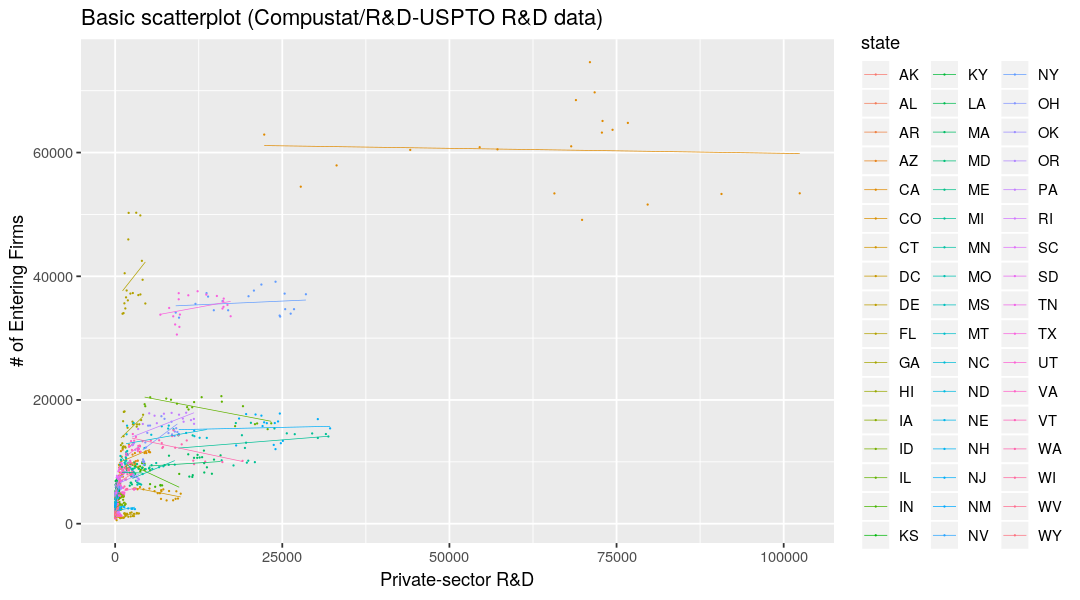

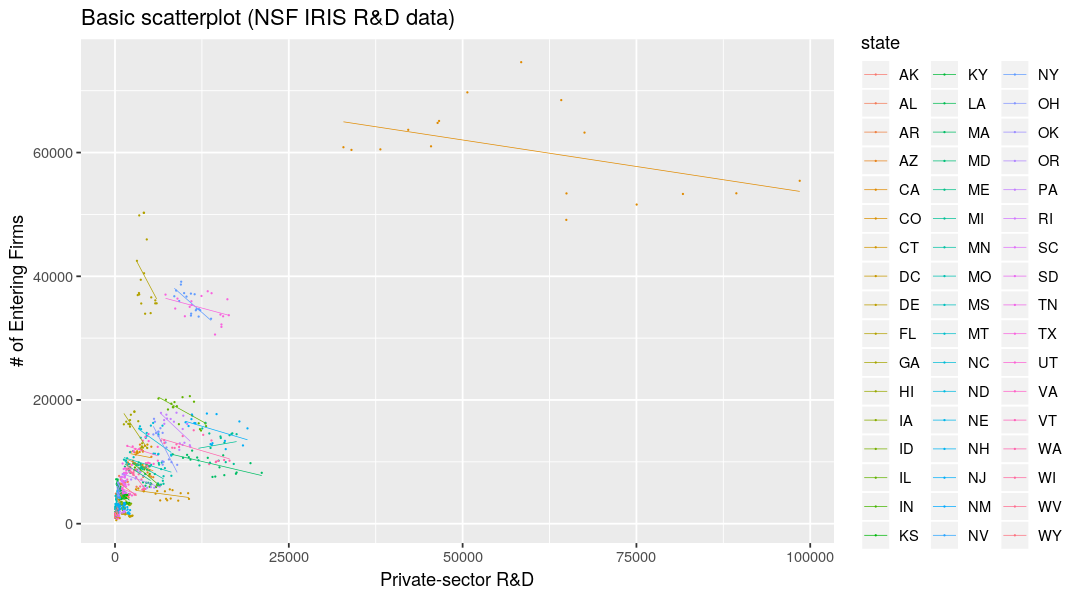

In [201]:
options(repr.plot.width = 9, repr.plot.height = 5)

#---------------------------------#
# Compustat/NBER-USPTO R&D data
#---------------------------------#

ggplot(data,aes(x = xrd, y = Firms, color = state)) + 
    geom_point(size = 0) + 
    geom_smooth(method = lm,size = 0.2, se = FALSE) + 
    labs(x = "Private-sector R&D", y = "# of Entering Firms") + 
    ggtitle("Basic scatterplot (Compustat/NBER-USPTO R&D data)")

#---------------------------------#
# NSF IRIS R&D data
#---------------------------------#

ggplot(data,aes(x = xrdBusinessNSF, y = Firms, color = state)) + 
    geom_point(size = 0) + 
    geom_smooth(method = lm,size = 0.2, se = FALSE) + 
    labs(x = "Private-sector R&D", y = "# of Entering Firms") + 
    ggtitle("Basic scatterplot (NSF IRIS R&D data)")

### Normalized variables

Warning message:
“Removed 204 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 204 rows containing missing values (geom_point).”

Warning message:
“Removed 160 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 160 rows containing missing values (geom_point).”

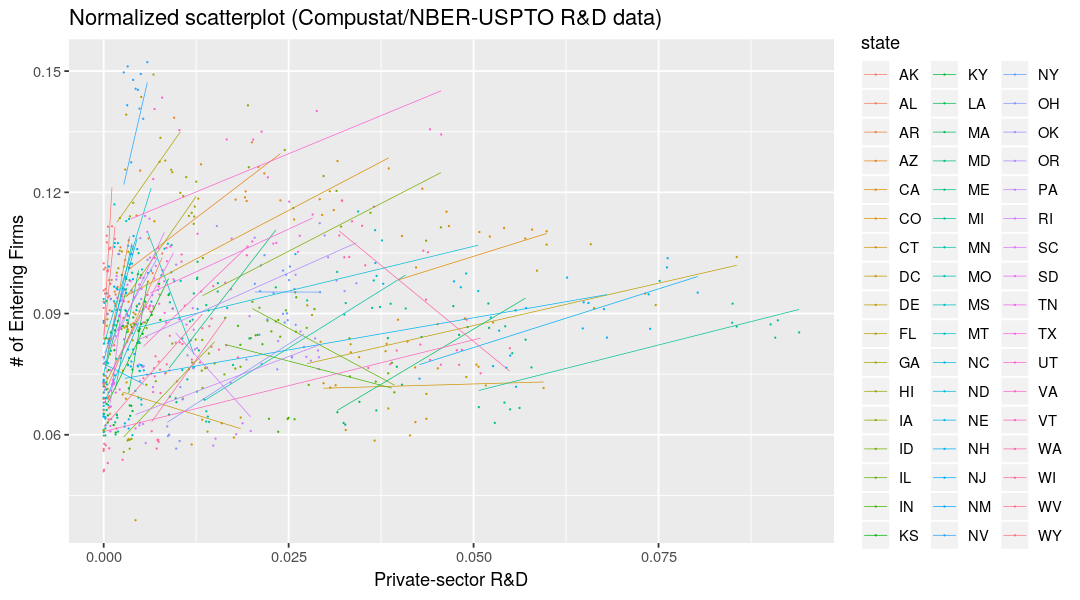

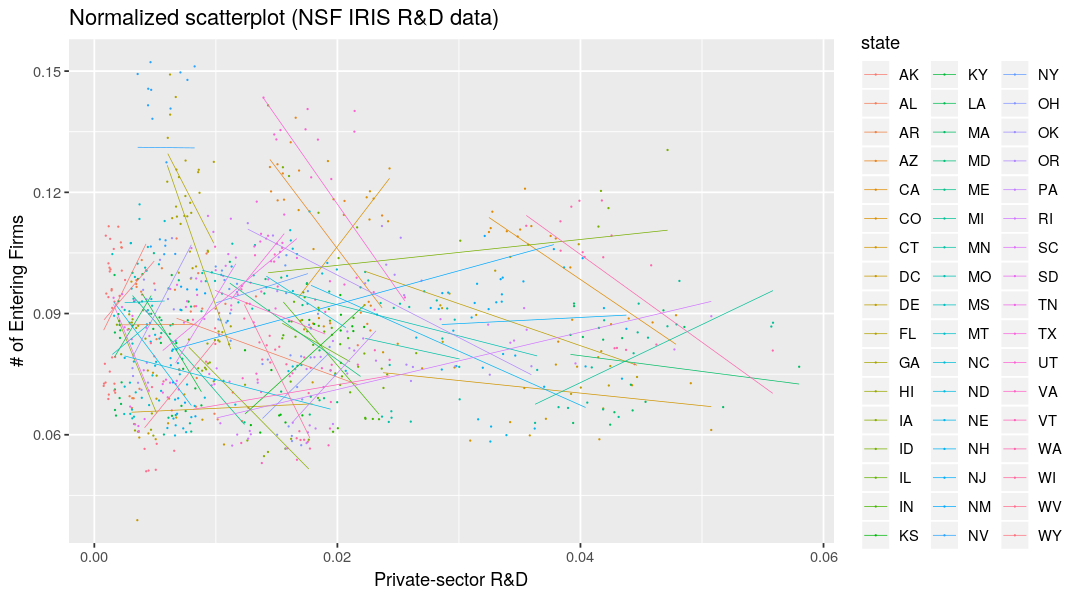

In [206]:
#---------------------------------#
# Compustat/NBER-USPTO R&D data
#---------------------------------#

ggplot(data,aes(x = xrdGDP, y = Firms / firmsTotal, color = state)) + 
    geom_point(size = 0) + 
    geom_smooth(method = lm,size = 0.2, se = FALSE) + 
    labs(x = "Private-sector R&D", y = "# of Entering Firms") + 
    ggtitle("Normalized scatterplot (Compustat/NBER-USPTO R&D data)")

#---------------------------------#
# NSF IRIS R&D data
#---------------------------------#

ggplot(data,aes(x = xrdBusinessNSF_gdpBusinessNSF, y = Firms / firmsTotal, color = state)) + 
    geom_point(size = 0) + 
    geom_smooth(method = lm,size = 0.2, se = FALSE) + 
    labs(x = "Private-sector R&D", y = "# of Entering Firms") + 
    ggtitle("Normalized scatterplot (NSF IRIS R&D data)")

# Regressions

### Outline

Below I do some regressions. Throughout I cluster standard errors at the state level. I perform each regression for each entry measure and each measure of R&D (xrdNSF, xrdRaw, xrd). The regressions I perform are

1. Pooling estimator (i.e. Raw OLS)
    a. without lags
    b. with lags
2. State- and year-fixed effects estimator (within)
    a. without lags
    b. with lags
3. (2), but using IV
    a. without lags
    b. with lags
   


#### Set data as panel data

In [2]:
dataPanel <- pdata.frame(data, index = c("state","year"))

## Pooling estimator (Raw OLS)

### No lags

In [227]:
cat(paste("","firmsGDP ~ xrdGDP (Compustat/NBER-USPTO R&D data)", 
           "------------------------------",sep="\n"))

model <- plm(firmsGDP ~ xrdGDP, data = dataPanel,
            model = "pooling")
summary(model, vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef
    
cat(paste("","firmsGDP ~ xrdGDP (NSF IRIS R&D data)", 
           "------------------------------",sep="\n"))
        
model <- plm(firmsGDP ~ xrdBusinessNSF_gdpBusinessNSF, data = dataPanel,
            model = "pooling")
summary(model, vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef
        



firmsGDP ~ xrdGDP (Compustat/NBER-USPTO R&D data)
------------------------------

,Estimate,Std. Error,t-value,Pr(>|t|)
(Intercept),0.05032568,0.002341973,21.4885854,1.747802e-81
xrdGDP,-0.04157038,0.085569895,-0.4858061,6.272354e-01



firmsGDP ~ xrdGDP (NSF IRIS R&D data)
------------------------------

,Estimate,Std. Error,t-value,Pr(>|t|)
(Intercept),0.05275485,0.003141551,16.792611,6.195674e-55
xrdBusinessNSF_gdpBusinessNSF,-0.26774412,0.140574111,-1.904647,5.716008e-02


In [228]:
cat(paste("","estabsGDP ~ xrdGDP (Compustat/NBER-USPTO R&D data)", 
           "------------------------------",sep="\n"))
        
model <- plm(estabsGDP ~ xrdGDP, data = dataPanel,
            model = "pooling")
summary(model, vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef
        
cat(paste("","estabsGDP ~ xrdGDP (NSF IRIS R&D data)", 
           "------------------------------",sep="\n"))
        
model <- plm(estabsGDP ~ xrdBusinessNSF_gdpBusinessNSF, data = dataPanel,
            model = "pooling")
summary(model, vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef



estabsGDP ~ xrdGDP (Compustat/NBER-USPTO R&D data)
------------------------------

,Estimate,Std. Error,t-value,Pr(>|t|)
(Intercept),0.05079308,0.00235076,21.6070929,3.426028e-82
xrdGDP,-0.04330810,0.08608412,-0.5030904,6.150368e-01



estabsGDP ~ xrdGDP (NSF IRIS R&D data)
------------------------------

,Estimate,Std. Error,t-value,Pr(>|t|)
(Intercept),0.05325355,0.003157192,16.867375,2.397824e-55
xrdBusinessNSF_gdpBusinessNSF,-0.27151625,0.141509627,-1.918712,5.535229e-02


In [229]:
cat(paste("","empGDP ~ xrdGDP (Compustat/NBER-USPTO R&D data)", 
           "------------------------------",sep="\n"))
         
model <- plm(empGDP ~ xrdGDP, data = dataPanel,
            model = "pooling")
summary(model, vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef
        
cat(paste("","empGDP ~ xrdGDP (NSF IRIS R&D data)", 
           "------------------------------",sep="\n"))
         
model <- plm(empGDP ~ xrdBusinessNSF_gdpBusinessNSF, data = dataPanel,
            model = "pooling")
summary(model, vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef



empGDP ~ xrdGDP (Compustat/NBER-USPTO R&D data)
------------------------------

,Estimate,Std. Error,t-value,Pr(>|t|)
(Intercept),0.2965305,0.01046237,28.3425758,1.754292e-123
xrdGDP,-0.1107203,0.44543261,-0.2485681,8.037576e-01



empGDP ~ xrdGDP (NSF IRIS R&D data)
------------------------------

,Estimate,Std. Error,t-value,Pr(>|t|)
(Intercept),0.3128859,0.01439032,21.742801,7.720337e-84
xrdBusinessNSF_gdpBusinessNSF,-1.5533518,0.70047444,-2.217571,2.684540e-02


### Adding lags

In [234]:
cat(paste("","firmsGDP ~ lag(xrdGDP,0:5) (Compustat/NBER-USPTO R&D data)", 
           "------------------------------",sep="\n"))

model <- plm(firmsGDP ~ plm::lag(xrdGDP,0:5), data = dataPanel,
            model = "pooling")
summary(model, vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef
        
cat(paste("","firmsGDP ~ lag(xrdGDP,0:5) (NSF IRIS R&D data)", 
           "------------------------------",sep="\n"))

model <- plm(firmsGDP ~ plm::lag(xrdBusinessNSF_gdpBusinessNSF,0:5), data = dataPanel,
            model = "pooling")
summary(model, vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef


firmsGDP ~ lag(xrdGDP,0:5) (Compustat/NBER-USPTO R&D data)
------------------------------

,Estimate,Std. Error,t-value,Pr(>|t|)
(Intercept),0.04196541,0.002045726,20.513700,5.401584e-70
"plm::lag(xrdGDP, 0:5)0",-0.68611459,0.162383876,-4.225263,2.790549e-05
"plm::lag(xrdGDP, 0:5)1",0.35061846,0.164869193,2.126646,3.389082e-02
"plm::lag(xrdGDP, 0:5)2",0.16426385,0.078351605,2.096496,3.649111e-02
"plm::lag(xrdGDP, 0:5)3",0.12628198,0.046873348,2.694110,7.271706e-03
"plm::lag(xrdGDP, 0:5)4",0.34334508,0.085059543,4.036526,6.188458e-05
"plm::lag(xrdGDP, 0:5)5",-0.38802362,0.109198169,-3.553389,4.127452e-04



firmsGDP ~ lag(xrdGDP,0:5) (NSF IRIS R&D data)
------------------------------

,Estimate,Std. Error,t-value,Pr(>|t|)
(Intercept),0.04331890,0.002750664,15.7485241,7.829705e-47
"plm::lag(xrdBusinessNSF_gdpBusinessNSF, 0:5)0",-0.03646496,0.232490349,-0.1568450,8.754212e-01
"plm::lag(xrdBusinessNSF_gdpBusinessNSF, 0:5)1",-0.48568497,0.168558905,-2.8813961,4.104641e-03
"plm::lag(xrdBusinessNSF_gdpBusinessNSF, 0:5)2",-0.12131835,0.086022429,-1.4103107,1.589804e-01
"plm::lag(xrdBusinessNSF_gdpBusinessNSF, 0:5)3",0.10925746,0.122747991,0.8900957,3.737810e-01
"plm::lag(xrdBusinessNSF_gdpBusinessNSF, 0:5)4",0.18134803,0.100696888,1.8009299,7.222971e-02
"plm::lag(xrdBusinessNSF_gdpBusinessNSF, 0:5)5",0.15920410,0.337209928,0.4721216,6.370163e-01


In [ ]:
        
cat(paste("","","","estabsGDP ~ lag(xrdGDP,0:5)", 
           "------------------------------",sep="\n"))
        
model2 <- plm(estabsGDP ~ plm::lag(xrdGDP,0:5), data = dataPanel,
            model = "pooling")
summary(model2, vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef
        
        
        
cat(paste("","","","empGDP ~ lag(xrdGDP,0:5)", 
           "------------------------------",sep="\n"))
        
model3 <- plm(empGDP ~ plm::lag(xrdGDP,0:5), data = dataPanel,
            model = "pooling")
summary(model3, vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef

### Adding state- and year-fixed effects

In [136]:
## Number of firms

cat(paste("","firmsGDP vs xrdGDP", 
           "------------------------------",sep="\n"))

model1 <- plm(formula = firmsGDP ~ plm::lag(xrdGDP,0:5), data = dataPanel,
              model = "within", effect = "twoways")
summary(model1,vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef
        
## Number of establishments

cat(paste("","","","estabsGDP vs xrdGDP", 
           "------------------------------",sep="\n"))

model1 <- plm(formula = estabsGDP ~ plm::lag(xrdGDP,0:5), data = dataPanel,
              model = "within", effect = "twoways")
summary(model1,vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef
        
        
## Employment
        
cat(paste("","","","empGDP vs xrdGDP", 
           "------------------------------",sep="\n"))

model2 <- plm(formula = empGDP ~ plm::lag(xrdGDP,0:5), data = dataPanel,
              model = "within", effect = "twoways")
summary(model2,vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef


firmsGDP vs xrdGDP
------------------------------

Twoways effects Within Model

Note: Coefficient variance-covariance matrix supplied: function(x) vcovHC(x, cluster = "group", type = "HC3")

Call:
plm(formula = firmsGDP ~ plm::lag(xrdGDP, 0:5), data = dataPanel, 
    effect = "twoways", model = "within")

Balanced Panel: n = 51, T = 28, N = 1428

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-4.7174e-02 -4.1662e-03 -8.1817e-05  3.4503e-03  7.1295e-02 

Coefficients:
                         Estimate Std. Error t-value Pr(>|t|)
plm::lag(xrdGDP, 0:5)0  0.0533594  0.0602879  0.8851   0.3763
plm::lag(xrdGDP, 0:5)1  0.0409978  0.0273112  1.5011   0.1336
plm::lag(xrdGDP, 0:5)2  0.0445103  0.0415745  1.0706   0.2845
plm::lag(xrdGDP, 0:5)3 -0.0414184  0.0480948 -0.8612   0.3893
plm::lag(xrdGDP, 0:5)4  0.0086789  0.0323256  0.2685   0.7884
plm::lag(xrdGDP, 0:5)5 -0.0318491  0.1060035 -0.3005   0.7639

Total Sum of Squares:    0.11522
Residual Sum of Squares: 0.11474
R-Squared:      0.0041745
Adj. R-Squared: -0.057324





estabsGDP vs xrdGDP
------------------------------

Twoways effects Within Model

Note: Coefficient variance-covariance matrix supplied: function(x) vcovHC(x, cluster = "group", type = "HC3")

Call:
plm(formula = estabsGDP ~ plm::lag(xrdGDP, 0:5), data = dataPanel, 
    effect = "twoways", model = "within")

Balanced Panel: n = 51, T = 28, N = 1428

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-0.04808775 -0.00415862 -0.00011482  0.00337841  0.07110003 

Coefficients:
                         Estimate Std. Error t-value Pr(>|t|)
plm::lag(xrdGDP, 0:5)0  0.0541644  0.0600834  0.9015   0.3675
plm::lag(xrdGDP, 0:5)1  0.0455749  0.0277159  1.6444   0.1003
plm::lag(xrdGDP, 0:5)2  0.0393201  0.0422909  0.9298   0.3527
plm::lag(xrdGDP, 0:5)3 -0.0403570  0.0481469 -0.8382   0.4021
plm::lag(xrdGDP, 0:5)4  0.0087629  0.0326681  0.2682   0.7886
plm::lag(xrdGDP, 0:5)5 -0.0335515  0.1063523 -0.3155   0.7524

Total Sum of Squares:    0.11645
Residual Sum of Squares: 0.11595
R-Squared:      0.0042454
Adj. R-Squared: -0.057248




empGDP vs xrdGDP
------------------------------

Twoways effects Within Model

Note: Coefficient variance-covariance matrix supplied: function(x) vcovHC(x, cluster = "group", type = "HC3")

Call:
plm(formula = empGDP ~ plm::lag(xrdGDP, 0:5), data = dataPanel, 
    effect = "twoways", model = "within")

Balanced Panel: n = 51, T = 28, N = 1428

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.2938128 -0.0284770 -0.0023439  0.0232188  1.0386282 

Coefficients:
                        Estimate Std. Error t-value Pr(>|t|)  
plm::lag(xrdGDP, 0:5)0  0.620175   0.344767  1.7988  0.07227 .
plm::lag(xrdGDP, 0:5)1  0.468819   0.247915  1.8910  0.05883 .
plm::lag(xrdGDP, 0:5)2 -0.491003   0.427205 -1.1493  0.25062  
plm::lag(xrdGDP, 0:5)3  0.007071   0.336828  0.0210  0.98325  
plm::lag(xrdGDP, 0:5)4  1.007665   0.564937  1.7837  0.07470 .
plm::lag(xrdGDP, 0:5)5 -1.020124   0.945591 -1.0788  0.28086  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    5.185
Residual Sum of Squares: 

### Alternative normalization

Originally, I normalized the LHS and RHS variables by different variables that each make more sense. That is, instead of normalizing firm entry by GDP, I normalize it by total # of firms in that state-year. This has the downside of introducing some additional noise, but the advantage that it allows the specification to be robust to groups having different GDP / # of firms, etc. ratios. Not sure which approach is better.

In [137]:
## Number of entering firms, normalized by total number of firms

cat(paste("","firmsNorm vs xrdGDP", 
           "------------------------------",sep="\n"))

model1 <- plm(formula = firmsNorm ~ plm::lag(xrdGDP,0:5), data = dataPanel,
              model = "within", effect = "twoways")
summary(model1,vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef
        
## Number of entering establishments, normalized by total number of establishments

cat(paste("","","","estabsGDP vs xrdGDP", 
           "------------------------------",sep="\n"))

model1 <- plm(formula = estabsNorm ~ plm::lag(xrdGDP,0:5), data = dataPanel,
              model = "within", effect = "twoways")
summary(model1,vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef
        
## Number of entering jobs, normalized by total number of jobs

cat(paste("","empNorm vs xrdGDP", 
           "------------------------------",sep="\n"))

model1 <- plm(formula = empNorm ~ plm::lag(xrdGDP,0:5), data = dataPanel,
              model = "within", effect = "twoways")
summary(model1,vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))$coef


firmsNorm vs xrdGDP
------------------------------

Twoways effects Within Model

Note: Coefficient variance-covariance matrix supplied: function(x) vcovHC(x, cluster = "group", type = "HC3")

Call:
plm(formula = firmsNorm ~ plm::lag(xrdGDP, 0:5), data = dataPanel, 
    effect = "twoways", model = "within")

Balanced Panel: n = 51, T = 28, N = 1428

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-0.03136072 -0.00352453 -0.00016589  0.00272887  0.04126320 

Coefficients:
                        Estimate Std. Error t-value Pr(>|t|)
plm::lag(xrdGDP, 0:5)0  0.044926   0.037790  1.1888   0.2347
plm::lag(xrdGDP, 0:5)1  0.041267   0.025868  1.5953   0.1109
plm::lag(xrdGDP, 0:5)2  0.012100   0.023583  0.5131   0.6080
plm::lag(xrdGDP, 0:5)3 -0.029302   0.044737 -0.6550   0.5126
plm::lag(xrdGDP, 0:5)4  0.057126   0.036306  1.5735   0.1158
plm::lag(xrdGDP, 0:5)5 -0.012884   0.053254 -0.2419   0.8089

Total Sum of Squares:    0.058094
Residual Sum of Squares: 0.057566
R-Squared:      0.0090984
Adj. R-Squared: -0.052096
F-st




estabsGDP vs xrdGDP
------------------------------

Twoways effects Within Model

Note: Coefficient variance-covariance matrix supplied: function(x) vcovHC(x, cluster = "group", type = "HC3")

Call:
plm(formula = estabsNorm ~ plm::lag(xrdGDP, 0:5), data = dataPanel, 
    effect = "twoways", model = "within")

Balanced Panel: n = 51, T = 28, N = 1428

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-2.5580e-02 -2.9415e-03 -4.6928e-05  2.3924e-03  3.8124e-02 

Coefficients:
                         Estimate Std. Error t-value Pr(>|t|)  
plm::lag(xrdGDP, 0:5)0  0.0360956  0.0335767  1.0750  0.28256  
plm::lag(xrdGDP, 0:5)1  0.0360254  0.0225500  1.5976  0.11037  
plm::lag(xrdGDP, 0:5)2  0.0102472  0.0215029  0.4765  0.63376  
plm::lag(xrdGDP, 0:5)3 -0.0196856  0.0370385 -0.5315  0.59517  
plm::lag(xrdGDP, 0:5)4  0.0543779  0.0324197  1.6773  0.09371 .
plm::lag(xrdGDP, 0:5)5 -0.0046596  0.0483560 -0.0964  0.92325  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    0.044924
R


empNorm vs xrdGDP
------------------------------

Twoways effects Within Model

Note: Coefficient variance-covariance matrix supplied: function(x) vcovHC(x, cluster = "group", type = "HC3")

Call:
plm(formula = empNorm ~ plm::lag(xrdGDP, 0:5), data = dataPanel, 
    effect = "twoways", model = "within")

Balanced Panel: n = 51, T = 28, N = 1428

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-0.01082797 -0.00173691 -0.00008637  0.00134748  0.05323181 

Coefficients:
                         Estimate Std. Error t-value Pr(>|t|)  
plm::lag(xrdGDP, 0:5)0  0.0245452  0.0204048  1.2029  0.22922  
plm::lag(xrdGDP, 0:5)1  0.0194919  0.0201969  0.9651  0.33467  
plm::lag(xrdGDP, 0:5)2 -0.0557841  0.0377813 -1.4765  0.14004  
plm::lag(xrdGDP, 0:5)3  0.0099442  0.0253263  0.3926  0.69465  
plm::lag(xrdGDP, 0:5)4  0.0672462  0.0286278  2.3490  0.01897 *
plm::lag(xrdGDP, 0:5)5 -0.0090103  0.0457752 -0.1968  0.84398  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    0.017587
Resi

### Not normalized variables

In [10]:
## Number of firms

laglength <- 5

cat(paste("","Firms vs xrd", 
           "------------------------------",sep="\n"))

model1 <- plm(formula = Firms ~ plm::lag(xrd,0:laglength), data = dataPanel,
              model = "within", effect = "twoways")
summary(model1,vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))
        
## Number of establishments

cat(paste("","","","Estabs vs xrd", 
           "------------------------------",sep="\n"))

model1 <- plm(formula = Estabs ~ plm::lag(xrd,0:laglength), data = dataPanel,
              model = "within", effect = "twoways")
summary(model1,vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))
        
        
## Employment
        
cat(paste("","","","Emp vs xrd", 
           "------------------------------",sep="\n"))

model2 <- plm(formula = Emp ~ plm::lag(xrd,0:laglength), data = dataPanel,
              model = "within", effect = "twoways")
summary(model2,vcov = function(x) vcovHC(x, cluster = "group", type = "HC3"))


Firms vs xrd
------------------------------

Twoways effects Within Model

Note: Coefficient variance-covariance matrix supplied: function(x) vcovHC(x, cluster = "group", type = "HC3")

Call:
plm(formula = Firms ~ plm::lag(xrd, 0:laglength), data = dataPanel, 
    effect = "twoways", model = "within")

Balanced Panel: n = 51, T = 14, N = 714

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-9452.901  -509.063   -46.478   546.709 10101.835 

Coefficients:
                             Estimate Std. Error t-value  Pr(>|t|)    
plm::lag(xrd, 0:laglength)0 -0.172161   0.091024 -1.8914 0.0590218 .  
plm::lag(xrd, 0:laglength)1  0.061686   0.042249  1.4601 0.1447594    
plm::lag(xrd, 0:laglength)2  0.108949   0.029743  3.6630 0.0002698 ***
plm::lag(xrd, 0:laglength)3  0.171615   0.082161  2.0888 0.0371202 *  
plm::lag(xrd, 0:laglength)4  0.147239   0.076445  1.9261 0.0545343 .  
plm::lag(xrd, 0:laglength)5 -0.303908   0.119484 -2.5435 0.0112076 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total S




Estabs vs xrd
------------------------------

Twoways effects Within Model

Note: Coefficient variance-covariance matrix supplied: function(x) vcovHC(x, cluster = "group", type = "HC3")

Call:
plm(formula = Estabs ~ plm::lag(xrd, 0:laglength), data = dataPanel, 
    effect = "twoways", model = "within")

Balanced Panel: n = 51, T = 14, N = 714

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-9385.640  -501.348   -41.776   551.653 10327.683 

Coefficients:
                             Estimate Std. Error t-value  Pr(>|t|)    
plm::lag(xrd, 0:laglength)0 -0.173917   0.090593 -1.9198 0.0553291 .  
plm::lag(xrd, 0:laglength)1  0.054928   0.040444  1.3581 0.1749040    
plm::lag(xrd, 0:laglength)2  0.112986   0.031217  3.6194 0.0003184 ***
plm::lag(xrd, 0:laglength)3  0.180153   0.089664  2.0092 0.0449317 *  
plm::lag(xrd, 0:laglength)4  0.150866   0.081717  1.8462 0.0653221 .  
plm::lag(xrd, 0:laglength)5 -0.311535   0.127703 -2.4395 0.0149754 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total 




Emp vs xrd
------------------------------

Twoways effects Within Model

Note: Coefficient variance-covariance matrix supplied: function(x) vcovHC(x, cluster = "group", type = "HC3")

Call:
plm(formula = Emp ~ plm::lag(xrd, 0:laglength), data = dataPanel, 
    effect = "twoways", model = "within")

Balanced Panel: n = 51, T = 14, N = 714

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-64194.44  -3864.39   -372.13   4320.16  85717.13 

Coefficients:
                            Estimate Std. Error t-value Pr(>|t|)  
plm::lag(xrd, 0:laglength)0 -1.47834    0.80487 -1.8368  0.06671 .
plm::lag(xrd, 0:laglength)1  0.71352    0.35088  2.0335  0.04241 *
plm::lag(xrd, 0:laglength)2  0.97953    0.42213  2.3204  0.02063 *
plm::lag(xrd, 0:laglength)3  1.56568    0.91754  1.7064  0.08842 .
plm::lag(xrd, 0:laglength)4  0.54501    0.34643  1.5732  0.11615  
plm::lag(xrd, 0:laglength)5 -3.16592    1.25838 -2.5159  0.01212 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    8.8768e+10
R

### Instrumental variables

Just for kicks, let's see what we get when using rho_high as an instrumental variable for R&D spending. Clearly the exclusion restriction doesn't apply, but it's still useful to get another angle on the data...

Unfortunately, there is some bug with my version of the R package plm that won't let me do this, EVEN FOR THE SAMPLE DATA IN THE DOCUMENTATION!

In [6]:
model1 <- pgmm(formula = firmsGDP ~ plm::lag(xrdGDP,0:5) | plm::lag(rho_high,0:5), data = dataPanel, effect = "twoways", model = "onestep")

ERROR: Error: `n` must be a nonnegative integer scalar, not double of length 5


In [4]:
data("EmplUK", package = "plm")

## Arellano and Bond (1991), table 4 col. b 
z1 <- pgmm(log(emp) ~ lag(log(emp), 1:2) + lag(log(wage), 0:1)
           + log(capital) + lag(log(output), 0:1) | lag(log(emp), 2:99),
            data = EmplUK, effect = "twoways", model = "twosteps")
summary(z1)

ERROR: Error: `n` must be a nonnegative integer scalar, not integer of length 2
